In [48]:
# Import necessary libraries
import os
import kagglehub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [13]:
# Download the dataset
path = "D:\pain recognition final\data\emotionpain"
print("Path to dataset files:", path)

Path to dataset files: D:\pain recognition final\data\emotionpain


<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\DELL\AppData\Local\Temp\ipykernel_17076\3811003351.py:2: SyntaxWarning: invalid escape sequence '\p'
  path = "D:\pain recognition final\data\emotionpain"


In [49]:
# Step 2: Set directories for images
train_dir = os.path.join(path, "Frame_Labels")  # Directory for training images
test_dir = os.path.join(path, "Images")         # Directory for testing images


In [50]:
# Verify directories exist
if not os.path.exists(train_dir):
    raise ValueError(f"Training directory {train_dir} does not exist.")
if not os.path.exists(test_dir):
    raise ValueError(f"Testing directory {test_dir} does not exist.")


In [51]:
# Step 3: Data preprocessing
IMG_SIZE = 200  # Image size (200x200)
BATCH_SIZE = 32  # Batch size


In [52]:
# Data augmentation for training and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [53]:
# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 0 images belonging to 1 classes.
Found 48398 images belonging to 1 classes.


In [54]:
# Print dataset statistics
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")


Training samples: 0
Validation samples: 48398


In [55]:
# Step 4: Build the model
model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)),  # Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

In [56]:
# Step 5: Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
import os
from sklearn.model_selection import train_test_split
import shutil

In [81]:
# Paths for Frame Labels and Images
frame_labels_dir = r"D:\pain recognition final\data\emotionpain\Frame_Labels\Frame_Labels"
images_dir = r"D:\pain recognition final\data\emotionpain\Images\Images"


In [82]:
# Define valid image extensions
valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")

In [83]:
# Output directories for train and validation datasets
output_dir = r"D:\pain recognition final\processed_data"
train_dir = os.path.join(output_dir, "train")
validation_dir = os.path.join(output_dir, "validation")

In [84]:
# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

In [85]:
# Step 1: Collect all image paths
all_files = []
for root, _, files in os.walk(images_dir):  # Traverse the Images directory
    for file in files:
        if file.lower().endswith(valid_extensions):  # Check valid image extensions
            all_files.append(os.path.join(root, file))

print(f"Found {len(all_files)} valid image files in the dataset.")


Found 48398 valid image files in the dataset.


In [86]:
# Step 2: Split into train and validation sets
train_files, val_files = train_test_split(all_files, test_size=0.2, random_state=42)


In [87]:
# Step 3: Move files into train and validation directories
for file in train_files:
    dest_dir = os.path.join(train_dir, os.path.basename(os.path.dirname(file)))
    os.makedirs(dest_dir, exist_ok=True)  # Ensure subdirectories are created
    shutil.copy(file, os.path.join(dest_dir, os.path.basename(file)))

for file in val_files:
    dest_dir = os.path.join(validation_dir, os.path.basename(os.path.dirname(file)))
    os.makedirs(dest_dir, exist_ok=True)  # Ensure subdirectories are created
    shutil.copy(file, os.path.join(dest_dir, os.path.basename(file)))

print(f"Moved {len(train_files)} files to the training directory.")
print(f"Moved {len(val_files)} files to the validation directory.")

Moved 38718 files to the training directory.
Moved 9680 files to the validation directory.


In [53]:
# Step 7: Save the model
model_save_path = "models/pain_recognition_model.h5"
os.makedirs("models", exist_ok=True)
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")

Model saved at: models/pain_recognition_model.h5


In [61]:
# Import necessary libraries
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt 

In [62]:
# Step 1: Define paths and parameters
IMG_SIZE = 200  # Image size (200x200)
BATCH_SIZE = 32  # Batch size
EPOCHS = 10  # Number of epochs
VALID_SPLIT = 0.2  # Validation split


In [63]:
# Define directories
base_dir = r"D:\pain recognition final\data\emotionpain"  # Base directory
images_dir = os.path.join(base_dir, "Images\Images")  # Path to all images
output_dir = os.path.join(base_dir, "processed_data")  # Output directory
train_dir = os.path.join(output_dir, "train")  # Training directory
validation_dir = os.path.join(output_dir, "validation")  # Validation directory
model_path = os.path.join(base_dir, "models", "pain_recognition_model.h5")  # Model save path
 

<>:3: SyntaxWarning: invalid escape sequence '\I'
<>:3: SyntaxWarning: invalid escape sequence '\I'
C:\Users\DELL\AppData\Local\Temp\ipykernel_14572\626026064.py:3: SyntaxWarning: invalid escape sequence '\I'
  images_dir = os.path.join(base_dir, "Images\Images")  # Path to all images


In [64]:
# Step 2: Prepare directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(os.path.dirname(model_path), exist_ok=True) 

In [65]:
# Step 3: Collect and organize data dynamically
def prepare_dataset(images_dir, train_dir, validation_dir, valid_extensions=(".jpg", ".jpeg", ".png")):
    all_files = []
    for root, _, files in os.walk(images_dir):  # Traverse the Images directory
        for file in files:
            if file.lower().endswith(valid_extensions):  # Check valid image extensions
                all_files.append(os.path.join(root, file))
    
    print(f"Found {len(all_files)} valid image files.")

    # Split dataset into training and validation sets
    train_files, val_files = train_test_split(all_files, test_size=VALID_SPLIT, random_state=42)

    # Move files into train and validation directories
    for file in train_files:
        dest_dir = os.path.join(train_dir, os.path.basename(os.path.dirname(file)))
        os.makedirs(dest_dir, exist_ok=True)  # Ensure subdirectories are created
        shutil.copy(file, os.path.join(dest_dir, os.path.basename(file)))

    for file in val_files:
        dest_dir = os.path.join(validation_dir, os.path.basename(os.path.dirname(file)))
        os.makedirs(dest_dir, exist_ok=True)  # Ensure subdirectories are created
        shutil.copy(file, os.path.join(dest_dir, os.path.basename(file)))

    print(f"Training data prepared: {len(train_files)} files")
    print(f"Validation data prepared: {len(val_files)} files")
 

In [66]:
# Step 4: Build the model
def build_model(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model 

Found 48398 valid image files.
Training data prepared: 38718 files
Validation data prepared: 9680 files
Found 38718 images belonging to 200 classes.
Found 9680 images belonging to 200 classes.
Building a new model...
Epoch 1/10
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 1664s 1s/step - accuracy: 0.0281 - loss: 4.9353 - val_accuracy: 0.2540 - val_loss: 2.3614
Epoch 2/10
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 1501s 1s/step - accuracy: 0.1625 - loss: 2.9573 - val_accuracy: 0.3163 - val_loss: 1.8084
Epoch 3/10
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 1734s 1s/step - accuracy: 0.2257 - loss: 2.4482 - val_accuracy: 0.3732 - val_loss: 1.6545
Epoch 4/10
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2871s 2s/step - accuracy: 0.2536 - loss: 2.2553 - val_accuracy: 0.3975 - val_loss: 1.5653
Epoch 5/10
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 4283s 4s/step - accuracy: 0.2696 - loss: 2.1473 - val_accuracy: 0.4232 - val_loss: 1.4899
Epoch 6/10
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 1916s 2s/step - accuracy: 0.2833 - loss: 2.0840 - val_accuracy: 0.4278 - val_loss

Model saved at: D:\pain recognition final\data\emotionpain\models\pain_recognition_model.h5


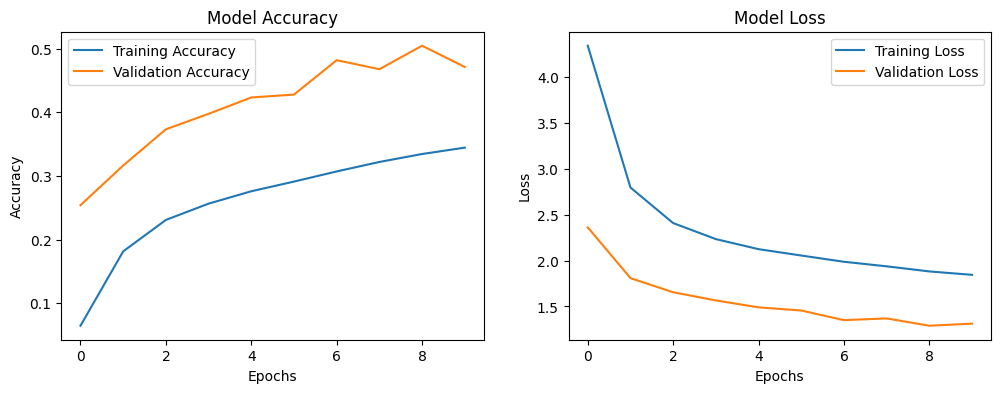

In [67]:
# Step 5: Train the model dynamically
def train_model(train_dir, validation_dir, model_path, epochs=EPOCHS, batch_size=BATCH_SIZE, img_size=IMG_SIZE):
    # Data preprocessing
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    validation_datagen = ImageDataGenerator(rescale=1./255)

    # Data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical'
    )
    validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Build or load the model
    if os.path.exists(model_path):
        print("Loading existing model...")
        model = load_model(model_path)
    else:
        print("Building a new model...")
        model = build_model(input_shape=(img_size, img_size, 3), num_classes=train_generator.num_classes)

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=epochs,
        steps_per_epoch=len(train_generator),
        validation_steps=len(validation_generator)
    )

    # Save the trained model
    model.save(model_path)
    print(f"Model saved at: {model_path}")

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Step 6: Run the pipeline
prepare_dataset(images_dir, train_dir, validation_dir)
train_model(train_dir, validation_dir, model_path)

In [1]:
# %% [markdown]
# ## Part 2: LSTM Model for Video-based Pain Recognition

# %% [markdown]
# ### 2.1 MediaPipe Setup and Feature Extraction
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5)

NameError: name 'mp' is not defined